In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import pandas as pd
import gaussianfunctions as gauss

### With BIC, 2 components

In [2]:
def EMGMM(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    return(em)

### With BIC, 3 components

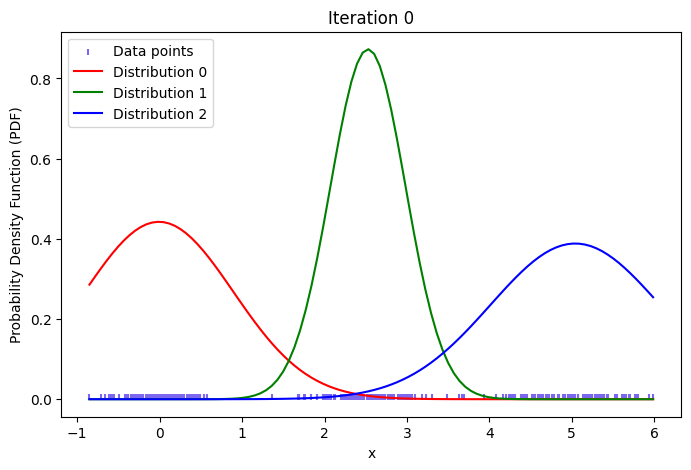

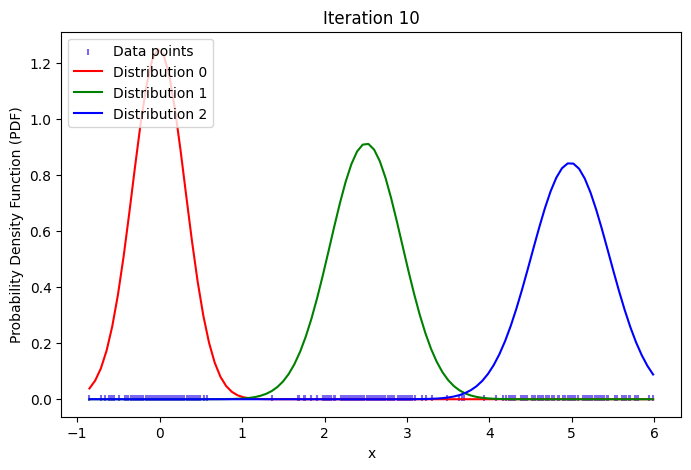

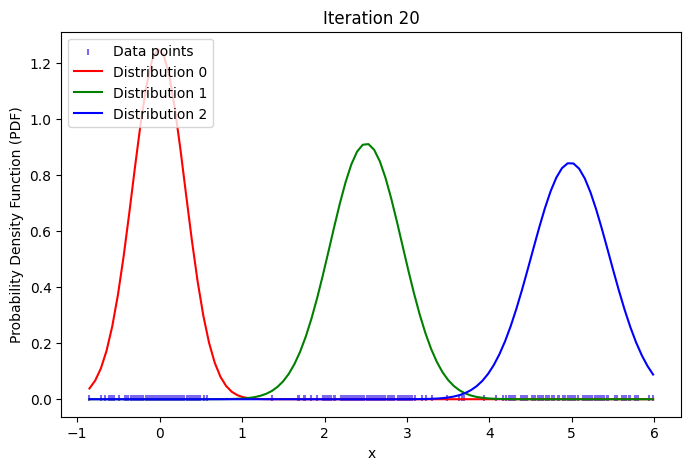

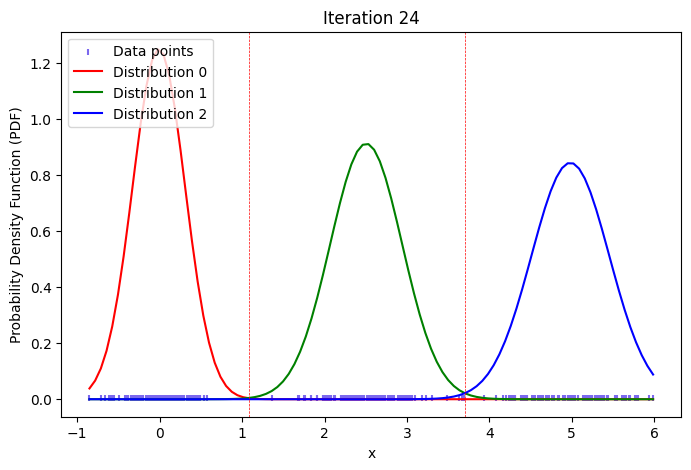

25

In [3]:
X1=np.random.normal(5,np.sqrt(0.2),100)
X2=np.random.normal(2.5,np.sqrt(0.2),100)
X3=np.random.normal(0,np.sqrt(0.1),100)
X=np.array(list(X1)+list(X2)+list(X3))

# gauss.PlotTrue(X,[5,2.5,0],[0.2,0.2,0.1])
em=EMGMM(X,[])
t=gauss.findThreshold(X,3,em)
gauss.PlotGMM(X,em,10,t)
len(em)

In [4]:
print(t)

[1.0822774832405506, 3.707082531638965]


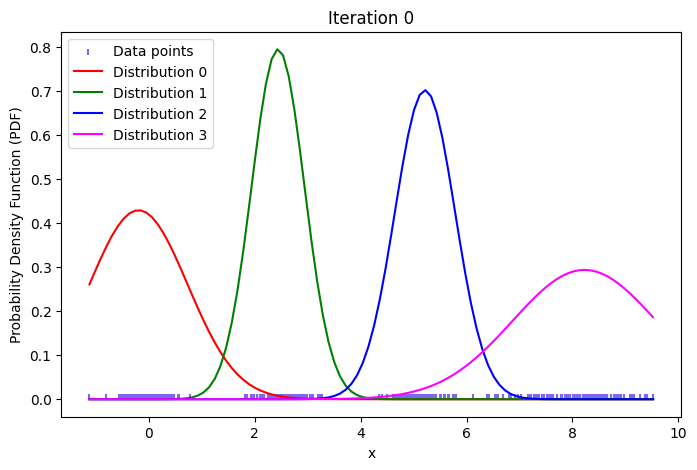

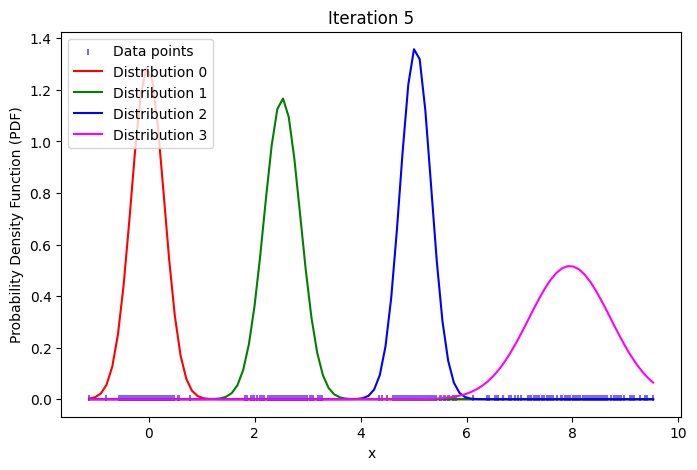

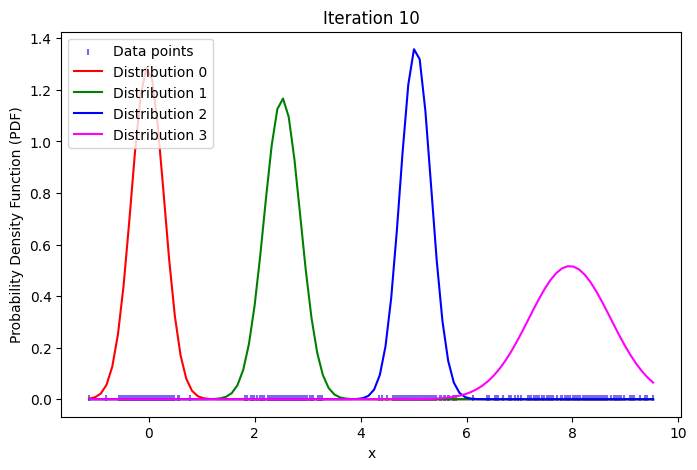

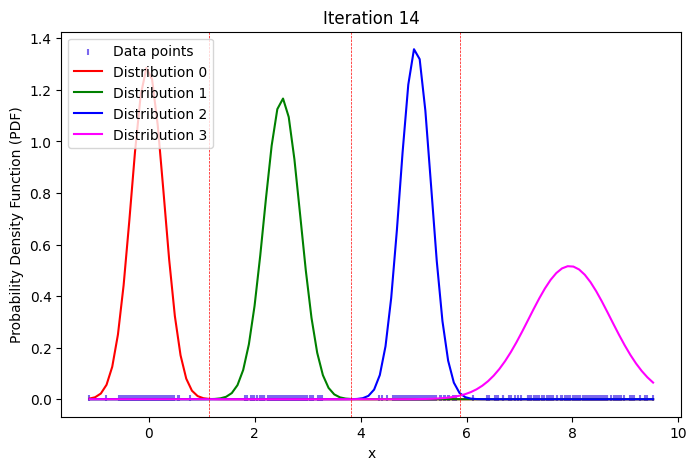

[1.1343073972915303, 3.8232656529362385, 5.866873927226216]


In [6]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

em=EMGMM(D,[])
t=gauss.findThreshold(D,gauss.BIC_gmm(D),em)
gauss.PlotGMM(D,em,5,t)
print(t)

### Use sklearn.mixture.GaussianMixture

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

def fitGaussEM(X):

    X=X.reshape(-1,1)
    gm=GaussianMixture().fit(X)
    N = np.arange(1, 11)
    models = [None for i in range(len(N))]

    for i in range(len(N)):
        models[i] = GaussianMixture(N[i]).fit(X)

    # compute the AIC and the BIC
    AIC = [m.aic(X) for m in models]
    BIC = [m.bic(X) for m in models]

    plt.figure(figsize=(8,5))
    M_best_BIC=models[np.argmin(BIC)]
    M_best_AIC=models[np.argmin(AIC)]

    b=np.linspace(np.min(X),np.max(X),100)

    log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
    log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

    resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
    resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

    pdf1=np.exp(log_prob1)
    pdf2=np.exp(log_prob2)


    # plt.plot(b,pdf1)
    plt.plot(b,pdf2)
    plt.hist(X,bins=75, density=True)

    plt.xlabel("$x$")
    plt.ylabel("Pdf")

    plt.show()



In [ ]:
def fitBayesianGauss(X,) :
    
    X=X.reshape(-1,1)
    gm=BayesianGaussianMixture().fit(X)
    
    bay_gmm_weights = gm.weights_
    np.round(bay_gmm_weights, 2)
    n_clusters_ = (np.round(bay_gmm_weights, 2) > 0).sum()
    print('Estimated number of clusters: ' + str(n_clusters_))



    # plt.plot(b,pdf1)
    plt.plot(b,pdf2)
    plt.hist(X,bins=75, density=True)

    plt.xlabel("$x$")
    plt.ylabel("Pdf")

    plt.show()


### Initial parameters

In [95]:
array=np.arange(10)
def get_spaced_elm(X, n_components):
    spaced_elm = X[np.round(np.linspace(0, len(X)-1, n_components)).astype(int)]
    spaced_elm= spaced_elm[0]+1e-6
    return spaced_elm
get_spaced_elm(array,3)

array([0, 4, 9])

In [86]:
def get_mid_spaced(array,n_elements):
    spaced_elm = array[np.round(np.linspace(0, len(array)-1, n_elements)).astype(int)]
    mid_spaced_elm=[]
    for i in range (n_elements-2):
        mid_spaced_elm.append(spaced_elm[i+1])
        
    return(mid_spaced_elm)

In [93]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))
mid=get_mid_spaced(np.sort(D),4)

init_means=get_spaced_elm(np.sort(D),4)

[-0.94579928  2.36010223  5.15530995  9.82017579] -0.9457992754052875 9.820175785578638


# Thresholding

In [1]:
G=gauss.SimulateGMM(100,10,4,3,1)
em=gauss.GaussianEM(G,2,[])

NameError: name 'gauss' is not defined

In [4]:
def thresholdGMM(X,n_components,iteration_data):

    thresholds=[]
    for i in range(n_components-1):
        a=(iteration_data[-1][i]['Variance']-iteration_data[-1][i+1]['Variance'])
        b=2*((iteration_data[-1][i]['Variance']*iteration_data[-1][i+1]['Mean'])-(iteration_data[-1][i+1]['Variance']*iteration_data[-1][i]['Mean']))
        c=(iteration_data[-1][i+1]['Variance']*(iteration_data[-1][i]['Mean'])**2)-(iteration_data[-1][i]['Variance']*(iteration_data[-1][i+1]['Mean'])**2)- \
            (2*iteration_data[-1][i]['Variance']*iteration_data[-1][i+1]['Variance']*np.log((iteration_data[-1][i]['Weight']*np.sqrt(iteration_data[-1][i+1]['Variance']))\
                /(iteration_data[-1][i+1]['Weight']*np.sqrt(iteration_data[-1][i]['Variance']))))
        
        dis = abs((b**2) - (4*a*c))

        thres1= (-b-np.sqrt(dis))/(2*a)
        thres2= (-b+np.sqrt(dis))/(2*a)

        if min(X)<thres1<max(X):
            thresholds.append(thres1)
        elif min(X)<thres2<max(X):
            thresholds.append(thres2)
        else:
            print("Thresholds are not within the range of data points")
    return(thresholds)

In [5]:
thresholdGMM(G,len(em[0]),em)

[4.597622388408189]

In [70]:
a=(em[-1][0]['Variance']-em[-1][1]['Variance'])
b=2*((em[-1][0]['Variance']*em[-1][1]['Mean'])-(em[-1][1]['Variance']*em[-1][0]['Mean']))
c=(em[-1][1]['Variance']*(em[-1][0]['Mean'])**2)-(em[-1][0]['Variance']*(em[-1][1]['Mean'])**2)- \
    (2*em[-1][0]['Variance']*em[-1][1]['Variance']*np.log((em[-1][0]['Weight']*np.sqrt(em[-1][1]['Variance']))/(em[-1][1]['Weight']*np.sqrt(em[-1][0]['Variance']))))
# calculate the discriminant
dis = abs((b**2) - (4*a*c))

# find two solutions
sol1 = (-b-np.sqrt(dis))/(2*a)
sol2 = (-b+np.sqrt(dis))/(2*a)

In [30]:
print(sol1,sol2) 

-5.458986260694206 4.519725920583622


## Using Mahalanobis Distance to set the threshold

In [64]:
from scipy.spatial import distance

#### Example

In [65]:
s = np.array([[20],[123],[113],[103],[123]])

covar = np.cov(s, rowvar=0,ddof=0)

invcovar = np.linalg.inv(covar.reshape((1,1)))
print(invcovar)
for i in range(len(s)-1):
    dis= distance.mahalanobis(s[i], s[i+1], invcovar)
    print(dis)

zscore_s=(s[0]-s[1])/np.std(s)
print(abs(zscore_s))

[[0.0006604]]
2.646914222786511
0.25698196337733115
0.25698196337733115
0.5139639267546623
[2.64691422]


In [66]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

In [69]:
for k in range(len(D_lastiter)):
    inv_var=np.linalg.inv(D_lastiter[k]['Variance'].reshape(1,1))

    for i in range (len(D)-1):
        dis= distance.mahalanobis([D[i]], [D[i+1]], inv_var)
        print(dis)


0.7023789750113691
0.30408972839214304
0.7974134112307356
1.9164816904692794
1.9531175157434948
0.11113289269930855
0.23148003283999882
2.5237423888454584
1.3496734397777497
0.016463827301802077
0.6425505833125331
1.2246616234883598
1.4300545275117789
2.7742461928568445
2.0083234641967675
1.4074560237300553
0.3453977293727769
0.7854157695723623
0.869721241441035
0.5024962032948468
1.7115007694870275
1.1530437487442677
1.419362411851862
1.293999597838298
0.16412776672564325
1.3735741386090696
0.3342127984442544
1.3101503356625612
1.9472503132626524
3.3299606439405034
2.4203040793172708
1.16613964268755
0.850576782756736
2.4383473384085748
1.541706444773335
0.7206640738522215
0.6339021849627209
0.07614835392339081
0.2596597278000315
0.5980123869460572
2.1864265222651578
2.461373904267054
0.7512651578207218
0.4791335549370183
0.3601110193607053
0.5186879874338775
1.2887275924401977
1.7288387625443473
0.6589624651036732
0.665508336661341
3.086622929348401
0.0467111267348728
1.7315220656214

### Using z-score

In [153]:

def findThres(X,n_components,iteration_data):

    X_lastiter=iteration_data[-1]
    thresholds=[]

    for k in range(n_components-1):
        X_space=np.linspace(min(X),max(X),100)
        zscore_1=list()
        zscore_2=list()
        for i in range(len(X_space)):
            zscore_1.append((X_space[i]-X_lastiter[k]['Mean'])/(np.sqrt(X_lastiter[k]['Variance'])))
            zscore_2.append((X_space[i]-X_lastiter[k+1]['Mean'])/(np.sqrt(X_lastiter[k+1]['Variance'])))
            
            def area_left(zscore):
                return norm.cdf(zscore)
            def area_right(zscore):
                return 1-norm.cdf(zscore)

            area_gaussone = area_right(zscore_1)
            area_gausstwo = area_left(zscore_2)

            thres = X_space[np.argmin(area_gaussone+area_gausstwo)]
        thresholds.append(thres)
    return(thresholds)
    
findThres(D,4,gauss.GaussianEM(D,4,[]))

[1.2913232325552273, 3.6668851421587663, 5.934466964962144]